# 10.RNN

### Importing Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Preprocess IMDb Dataset

In [2]:
# Load IMDb dataset
num_words = 10000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure equal input length
maxlen = 200
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

### Building the RNN Model

In [3]:
# Build RNN model with L2 regularization
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    SimpleRNN(50, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    SimpleRNN(50, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Model Compilation

In [4]:
# Compile model with AUC metric
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

### Callbacks for Early Stopping and Model Checkpointing

In [5]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

### Model Training

In [6]:
# Train model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5167 - auc: 0.5271 - loss: 1.3870
Epoch 1: val_auc improved from -inf to 0.80411, saving model to best_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 78ms/step - accuracy: 0.5169 - auc: 0.5274 - loss: 1.3862 - val_accuracy: 0.5723 - val_auc: 0.8041 - val_loss: 0.7933 - learning_rate: 0.0010
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6820 - auc: 0.7549 - loss: 0.6787
Epoch 2: val_auc improved from 0.80411 to 0.92046, saving model to best_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.6820 - auc: 0.7550 - loss: 0.6786 - val_accuracy: 0.8424 - val_auc: 0.9205 - val_loss: 0.4559 - learning_rate: 0.0010
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8741 - auc: 0.9439 - loss: 0.3710
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: val_auc did not improve from 0.92046
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.8741 - auc: 0.9439 - loss: 0.3710 - val_accuracy: 0.7719 - val_auc: 0.8658 - val_loss: 0.5202 - learning_rate: 0.0010
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9403 - auc: 0.9830 - loss: 0.2146
Epoch 4: val_auc improved from 0.92046 to 0.92331, saving model to best_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.9403 - auc: 0.9830 - loss: 0.2146 - val_accuracy: 0.8489 - val_auc: 0.9233 - val_loss: 0.4504 - learning_rate: 5.0000e-04
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9771 - auc: 0.9957 - loss: 0.1180
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 5: val_auc did not improve from 0.92331
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.9771 - auc: 0.9957 - loss: 0.1180 - val_accuracy: 0.8228 - val_auc: 0.9006 - val_loss: 0.5571 - learning_rate: 5.0000e-04
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9931 - auc: 0.9995 - loss: 0.0616
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 6: val_auc did not improve from 0.92331
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.9931 - auc: 0.9995 - loss: 0.0616 - val_accuracy: 0.8232 - val_auc: 0.8970 - val_loss: 0.6483 - learning_rate: 2.5000e-04


 ### Model Evaluation and Metrics

In [7]:
# Evaluate model
loss, accuracy, auc = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test AUC-ROC: {auc * 100:.2f}%')

# Predictions
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
Y_probs = model.predict(X_test).flatten()  # Probabilities for AUC-ROC

# Compute F1-score and AUC-ROC
f1 = f1_score(Y_test, Y_pred)
auc_roc = roc_auc_score(Y_test, Y_probs)
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {auc_roc:.2f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8464 - auc: 0.9202 - loss: 0.4593
Test Accuracy: 84.89%
Test AUC-ROC: 92.33%
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step
F1 Score: 0.84
AUC-ROC Score: 0.92


### Confusion Matrix Visualization

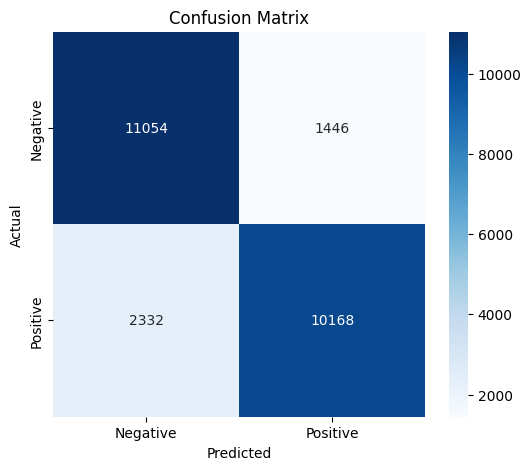

In [8]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:

# Classification Report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85     12500
           1       0.88      0.81      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



### ROC Curve Visualization

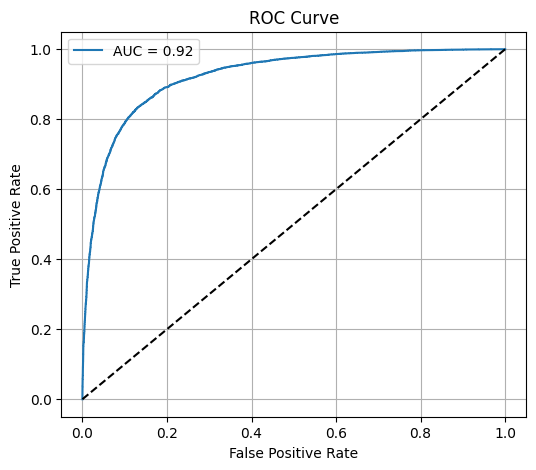

In [10]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

 ### Training History Plots

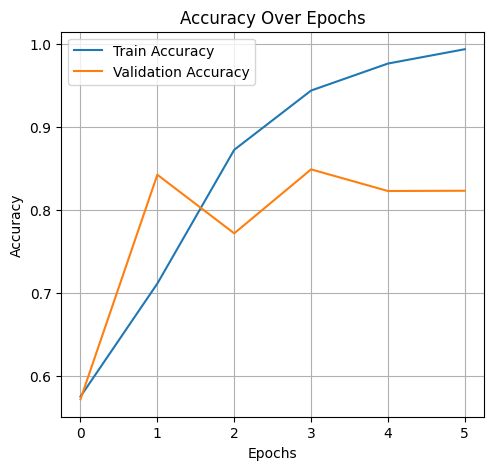

In [11]:
# Training History Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.grid(True)

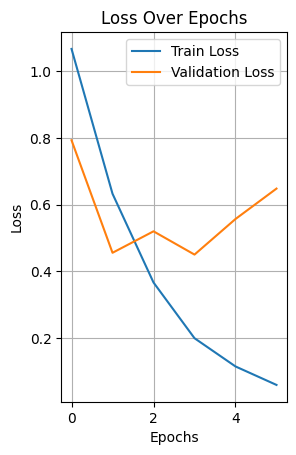

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.grid(True)

plt.show()